###  Islands: Generalized Linear Models - Chapter 3

[Back to Main Page](0_main_page.ipynb)

<br>

<h1> <center> Poisson Regression </center> </h1>  

## Context

[When would we use it]


## Model

[Show whole prediction equation]

$ \Large ln(\hat{y_{i}}) = b_{0} + b_{1}x_{1i} + ... b_{k}x_{ki}  $

$ \Large \hat{y_{i}} = e^{(b_{0} + b_{1}x_{1i} + ... b_{k}x_{ki})}  $

[Show individual prediction equations]

$$ \Large ln(\hat{y_{1}}) = b_{0} + b_{1}x_{11} + ... b_{k}x_{k1} $$

$$ \Large ln(\hat{y_{2}}) = b_{0} + b_{1}x_{12} + ... b_{k}x_{k2}  $$

$$ \Large ln(\hat{y_{3}}) = b_{0} + b_{1}x_{13} + ... b_{k}x_{k3}  $$

$$ \dots $$

$$ \Large ln(\hat{y_{n}}) = b_{0} + b_{1}x_{1n} + ... b_{k}x_{kn}  $$

[show matrix]

$$
\Large \begin{bmatrix}
           {ln(\hat{y}_{1})} \\
           \vdots \\
           {ln(\hat{y}_{n})}
         \end{bmatrix} = \begin{bmatrix}
           {1} & {x_{11}} & \dots & {x_{k1}}\\ 
           \vdots & \vdots & \vdots & \vdots\\
           {1} & {x_{1n}} & \dots & {x_{kn}} \\ 
         \end{bmatrix} \begin{bmatrix}
           {b_{0}} \\ 
           \vdots \\
           {b_{k}} \\ 
         \end{bmatrix} 
$$


[Show matrix form of prediction equation]


## Parameter Estimation


$ \Huge \prod \frac{\hat{y}^{y_i}_i e^{-\hat{y_i}}}{y_i!}$


$ \Huge \sum {y_i} ln(\hat{y}) -\hat{y_i} -ln(y_i!) $ 


[Plots of poisson distribution and image of what poisson regression is doing]

## Implementation

[one predictor model using minimize]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import islands_GLM

islands_GLM.r_ify()

C:\Users\rushpz\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
# island of 100 Alligasts (name from https://www.fantasynamegenerators.com/fantasy-animal-names.php).
# hypothesis is that the average voltage (over 1 hour) of neurons in the aggroloid cortex (a brain structure unique to these animals) correlates with
# number of rivals killed

pop_size = 100

average_hormone_change = np.random.normal(0, 80, pop_size)

bio_sex = np.random.choice([0,1], size = pop_size)

number_of_predation_events =  np.random.uniform(low =0.03, high = 0.05) * average_hormone_change + 5 * bio_sex

error = np.random.poisson(3, pop_size)


number_of_predation_events = number_of_predation_events  + error

number_of_predation_events[number_of_predation_events < 0] = np.random.poisson(3, 
                                                                               len(number_of_predation_events[number_of_predation_events < 0]))


df = pd.DataFrame({'average_hormone_change': np.round(average_hormone_change,2),
                   'biological_sex': bio_sex,
                   'number_of_predation_events': number_of_predation_events.astype('int') })

df

,average_hormone_change,biological_sex,number_of_predation_events
0,88.17,1,12
1,7.12,0,3
2,-5.97,1,7
3,32.67,0,5
4,-95.95,0,2
...,...,...,...
95,-220.02,1,3
96,11.34,1,6
97,-36.05,1,7
98,43.21,1,7


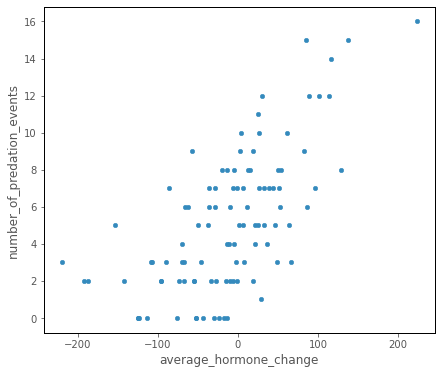

In [4]:
df.plot(x='average_hormone_change', y = 'number_of_predation_events', kind = 'scatter');

C:\Users\rushpz\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


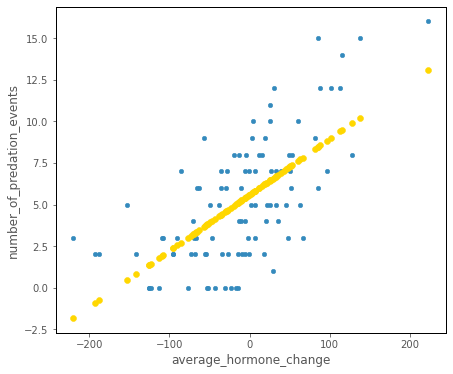

In [5]:
lin_reg = sm.OLS(df['number_of_predation_events'], sm.add_constant(df['average_hormone_change'])).fit()

lin_reg_predictions = lin_reg.params[0] + lin_reg.params[1] * df['average_hormone_change']

df.plot(x='average_hormone_change', y = 'number_of_predation_events', kind = 'scatter')
plt.scatter(df['average_hormone_change'], lin_reg_predictions, color = 'gold');

In [5]:
# nonsensical predictions
lin_reg.params[0] + lin_reg.params[1] * -200

-0.3147337532601968

In [6]:
mod2 = sm.GLM(df['number_of_predation_events'], sm.add_constant(df['average_hormone_change']), family = sm.families.Poisson()).fit()

mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Generalized Linear Model Regression Results                      
======================================================================================
Dep. Variable:     number_of_predation_events   No. Observations:                  100
Model:                                    GLM   Df Residuals:                       98
Model Family:                         Poisson   Df Model:                            1
Link Function:                            log   Scale:                          1.0000
Method:                                  IRLS   Log-Likelihood:                -249.46
Date:                        Mon, 14 Feb 2022   Deviance:                       187.13
Time:                                20:52:28   Pearson chi2:                     166.
No. Iterations:                             5                                         
Covariance Type:                    nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                1.5058      0.051     29.587      0.000       1.406       1.606
average_aggroloid_hormone_change     0.0053      0.000     11.128      0.000       0.004       0.006
====================================================================================================
"""

## Interpretation (one predictor model)

## Multi-predictor poisson regression

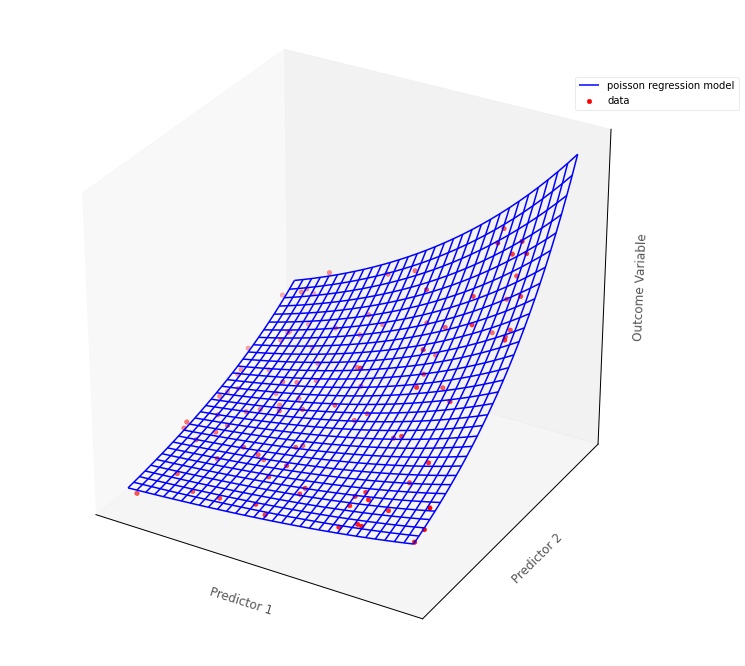

In [12]:
# show how poisson regression works in multiple dimensions

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
z = np.exp(0.2*x + 0.3*y)

data_x = np.random.choice(np.linspace(-3, 3, 32), size = 100)
data_y = np.random.choice(np.linspace(-3, 3, 32), size = 100)
data_z = np.exp(0.2*data_x + 0.3*data_y + np.random.normal(0, 0.3, size = 100))

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_wireframe(x,y,z, color = 'blue', label = 'poisson regression model')
ax1.scatter(data_x, data_y, data_z, color = 'red', label = 'data'  )
plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
ax1.set_zlabel('Outcome Variable')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
plt.legend(bbox_to_anchor = (1.1,0.9))
plt.show()

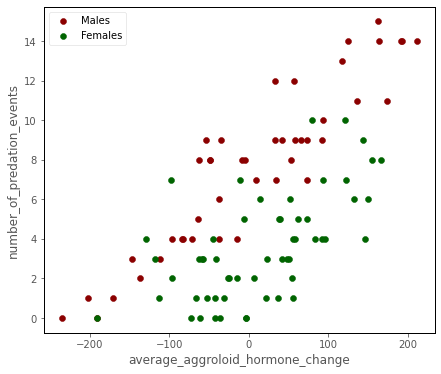

In [8]:
plt.scatter(df[df['biological_sex'] == 1]['average_hormone_change'], df[df['biological_sex'] == 1]['number_of_predation_events'], label = 'Males', color = 'darkred')
plt.scatter(df[df['biological_sex'] == 0]['average_hormone_change'], df[df['biological_sex'] == 0]['number_of_predation_events'], label = 'Females', color = 'darkgreen')
plt.xlabel('average_hormone_change')
plt.ylabel('number_of_predation_events')
plt.legend()
plt.show()

In [9]:
import statsmodels.formula.api as smf

mod3 = sm.GLM(df['number_of_predation_events'], sm.add_constant(df[['average_hormone_change', 'biological_sex']]), family = sm.families.Poisson()).fit()

mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Generalized Linear Model Regression Results                      
======================================================================================
Dep. Variable:     number_of_predation_events   No. Observations:                  100
Model:                                    GLM   Df Residuals:                       97
Model Family:                         Poisson   Df Model:                            2
Link Function:                            log   Scale:                          1.0000
Method:                                  IRLS   Log-Likelihood:                -213.84
Date:                        Mon, 14 Feb 2022   Deviance:                       115.89
Time:                                20:52:30   Pearson chi2:                     103.
No. Iterations:                             4                                         
Covariance Type:                    nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                1.1308      0.073     15.395      0.000       0.987       1.275
average_aggroloid_hormone_change     0.0049      0.000     10.810      0.000       0.004       0.006
biological_sex                       0.7395      0.089      8.273      0.000       0.564       0.915
====================================================================================================
"""

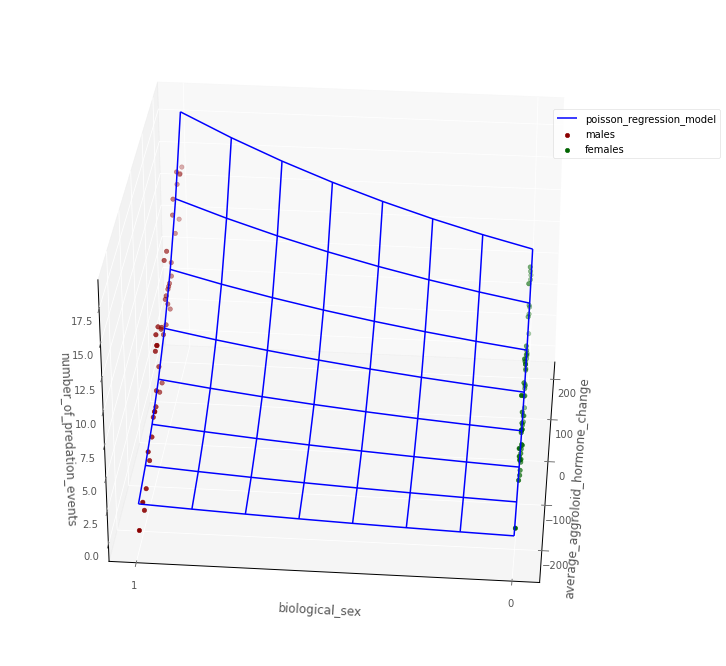

In [10]:
intercept, average_aggroloid_hormone_change_slope, biological_sex_slope = mod3.params[:3]

def three_D_model_plot(x_name, y_name, z_name, intercept, x_slope, y_slope, df, model_name, y1_name, y2_name):
    group_1 = df[df[y_name] == 1]
    group_2 = df[df[y_name] == 0]
    x = np.linspace(np.min(df[x_name]), np.max(df[x_name]), 8)
    y = np.linspace(np.min(df[y_name]), np.max(df[y_name]), 8)
    x, y = np.meshgrid(x, y)
    
    if model_name == 'linear_regression_model':
        z = intercept + x_slope * x.ravel() + y_slope * y.ravel()
    
    if model_name == 'poisson_regression_model':
        z = np.exp(intercept + x_slope * x.ravel() + y_slope * y.ravel())

    fig = plt.figure(figsize = (12, 12))
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.plot_wireframe(x, y,
                    z.reshape(x.shape), label = model_name, color = 'blue')
    ax1.scatter( group_1[x_name],  group_1[y_name] ,  group_1[z_name], color = 'darkred', label = y1_name  )
    ax1.scatter(group_2[x_name],  group_2[y_name] ,  group_2[z_name], color = 'darkgreen', label =  y2_name  )
    ax1.view_init(azim = 185)
    ax1.set_yticks([0,1])
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    ax1.set_zlabel(z_name)
    ax1.legend(bbox_to_anchor = (1.1,0.85))
    plt.show()
    
three_D_model_plot('average_hormone_change', 'biological_sex', 
                   'number_of_predation_events', intercept, average_aggroloid_hormone_change_slope, biological_sex_slope,
                  df, 'poisson_regression_model', 'males', 'females')

[Maybe mention sometimes called loglinear modelling (e.g. with all categorical predictors]

## Interpretation (multiple predictors)

## Statistical interaction in Poisson Regression

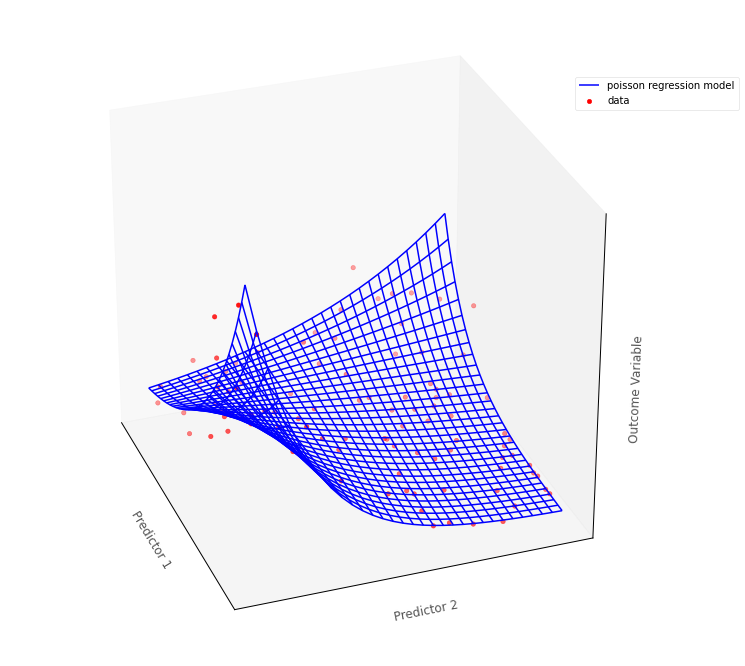

In [15]:
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
z = np.exp(0.2*x + 0.3*y + -0.2*x*y)

data_x = np.random.choice(np.linspace(-3, 3, 32), size = 100)
data_y = np.random.choice(np.linspace(-3, 3, 32), size = 100)
data_z = np.exp(0.2*data_x + 0.3*data_y + -0.2 *data_x*data_y + np.random.normal(0, 0.3, size = 100))

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_wireframe(x,y,z, color = 'blue', label = 'poisson regression model')
ax1.scatter(data_x, data_y, data_z, color = 'red', label = 'data'  )
plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
ax1.set_zlabel('Outcome Variable')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.view_init(azim = -200)
plt.legend(bbox_to_anchor = (1.1,0.9))
plt.show()

## Other Chapters

1. [What are Generalized Linear Models?](1_generalized_linear_models.ipynb)
2. [Linear Regression](2_linear_regression.ipynb)
3. [Poisson Regression](3_poisson_regression.ipynb)
4. [Binary Logistic Regression](4_binary_logistic_regression.ipynb)
5. [Multinomial Logistic Regression](5_multinomial_logistic_regression.ipynb)

***
By [pxr687](99_about_the_author.ipynb) 